# Introduction

Hello, in this notebook I'm going to show you how to use supervised learning in the task of identify if is a benign or malignant breast cancer. Below, is shown the Data Science Process. It's based in it that i'm going to teach the step by step to reach the result. 

![](https://miro.medium.com/max/3870/1*eE8DP4biqtaIK3aIy1S2zA.png)

# Code time:

# 1. Importing libraries

**scikit-learn** is the most widely used Python library for machine learning. **pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [2]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2. Loading the data


In [3]:
data = pd.read_csv("data.csv")

# 3. Cleaning the data

In [4]:
# Checking if there are null values in the dataset
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
# Deleting 'Unnamed: 32' column
data.drop("Unnamed: 32",axis=1,inplace=True)

In [6]:
# Deleting 'id' column
data.drop("id",axis=1,inplace=True)

# 4. Exploring the data

In [7]:
# Take a look to the data columns:
list(data.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# Mapping diagnosis to integer values
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

**The data can be divided into "mean", "se" and "worst", so below it is done:**

In [11]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])

**Getting the frequency of the breast cancer diagnosis:**
* 1 (Malignant)
* 0 (Benign)

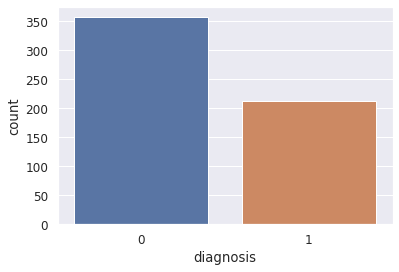

In [12]:
sns.set(style='darkgrid', font_scale=1.1)
sns.countplot(data['diagnosis'],label="Count")

## Analyzing data correlation
A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.
Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column.
The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.

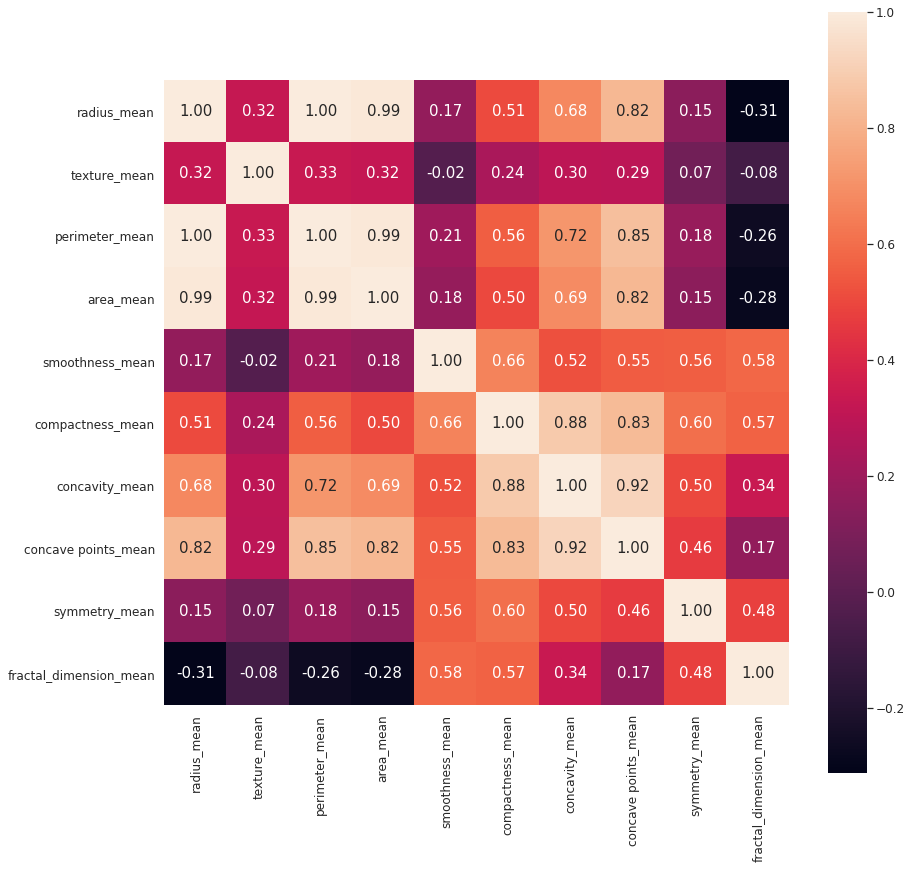

In [13]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean)

In [14]:
# Based on correlation heatmap, we can select some of the variables to be used on prediction
pred_var = ['texture_mean','radius_mean','smoothness_mean','concavity_mean','symmetry_mean']

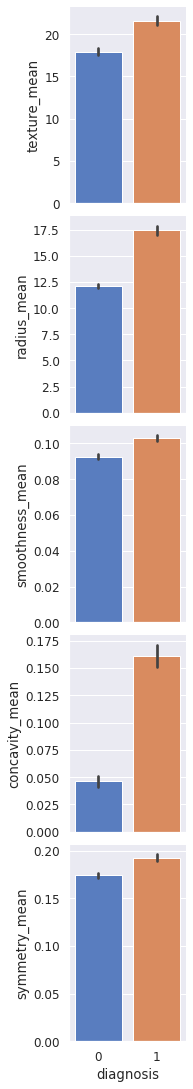

In [15]:
g = sns.PairGrid(data, y_vars=pred_var, x_vars=['diagnosis'], aspect=0.8, height=3.0)
g.map(sns.barplot, palette='muted')

# 5. Creating a model

We need to know how well it performs. To do this, the data is splitted in two parts: 1) a training dataset that we use for building the model, and 2) a test dataset that we use for testing the accuracy of our model. We do this with the use of the train_test_split function, which shuffles the dataset randomly, and by default extracts 75% of the cases as training data and 25% of the cases as test data.

In [16]:
data_target = data['diagnosis']
data_features = data.drop(['diagnosis'],axis=1)

In [17]:
# Splitting our dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, random_state=0)

In [18]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (426, 30)
y_train shape:  (426,)


In [19]:
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_test shape:  (143, 30)
y_test shape:  (143,)


## Model: K-Nearest Neighbors

KNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

![](https://3.bp.blogspot.com/-In1TiknFHSg/XHaqqP8UzhI/AAAAAAAAGSY/0m6BSNsFKqIEDVJZyhSatsi7jL2Kb4pwwCLcBGAs/s1600/knn.jpg)

### Building a model

In [20]:
# n_neighbors=1 is setting the number of nearest neighbors to 1.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
# build the model on the training set, i.e. X_train and y_train.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Model evaluation
Testing dataset to evaluate the accuracy of the model.

In [22]:
print("KNN-1 Accuracy on training set:  {:.3f}".format(knn.score(X_train, y_train)))
print("KNN-1 Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

KNN-1 Accuracy on training set:  1.000
KNN-1 Accuracy on test set: 0.916


The knn model with n_neighbors=1, has accuracy 100% on the training dataset. This means that it's over-fitting the training data.

### Testing predictions using the model

In [23]:
# specify one new instance to be predicted
X_new = np.array([[18.99,
10.30,
123.8,
1001,
0.119,
0.26,
0.30,
0.15,
0.24,
0.08,
1.095,
0.9053,
8.65,
157.4,
0.0064,
0.04904,
0.05373,
0.01587,
0.03003,
0.0053,
25.38,
17.33,
186.5,
2019,
0.1642,
0.6656,
0.7119,
0.2654,
0.4601,
0.1189]])

In [24]:
prediction = knn.predict(X_new)

print(f"Prediction: {'Malignant' if prediction == 1 else 'Benign'}")

Prediction: Malignant


### Improving the KNN model

Trying different numbers of k nearest neighbors.

In [25]:
knn = KNeighborsClassifier(n_neighbors=4)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [27]:
print("KNN-4 - Accuracy on training set:  {:.3f}".format(knn.score(X_train, y_train)))
print("KNN-4 - Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

KNN-4 - Accuracy on training set:  0.941
KNN-4 - Accuracy on test set: 0.937


There was an improvement in the accuracy of the model using 4 n_neighbors instead of 1.

In [28]:
prediction = knn.predict(X_new)

print(f"Prediction: {'Malignant' if prediction == 1 else 'Benign'}")

Prediction: Malignant


## Model: Decision Tree

It uses a decision tree to go from observations about an item to conclusions about the item's target value.

![](https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc)

*Basic Decision Tree example*

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
print("Decision Tree - Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree - Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree - Accuracy on training set: 1.000
Decision Tree - Accuracy on test set: 0.881


The decision tree built has accuracy 100% on the training dataset. This means that our decision tree is over-fitting the training data.
To avoid overfitting (and hopefully improve the accuracy of the model on test data), we can stop before the entire tree is created. We can do this by setting the maximal depth of the tree.

In [39]:
tree = DecisionTreeClassifier(max_depth=3, random_state=12)
tree.fit(X_train, y_train)

print("Decision Tree - Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree - Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree - Accuracy on training set: 0.977
Decision Tree - Accuracy on test set: 0.916


The new decision tree has lower accuracy on the training dataset, but higher accuracy on the test dataset.

In [32]:
prediction = tree.predict(X_new)

print(f"Prediction: {'Malignant' if prediction == 1 else 'Benign'}")

Prediction: Malignant


### Improving the Decision Tree model

Trying different max_depth in the decision tree model.

In [40]:
tree = DecisionTreeClassifier(max_depth=2, random_state=12)
tree.fit(X_train, y_train)

print("Decision Tree - Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree - Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree - Accuracy on training set: 0.941
Decision Tree - Accuracy on test set: 0.923


The new decision tree has lower accuracy on the training dataset, but higher accuracy on the test dataset. max_depth higher than this, has lesses accuracies.

## Model: Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)


In [42]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=999, max_depth=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [43]:
print("Random Forest - Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Random Forest - Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Random Forest - Accuracy on training set: 0.981
Random Forest - Accuracy on test set: 0.965


In [36]:
prediction = forest.predict(X_new)

print(f"Prediction: {'Malignant' if prediction == 1 else 'Benign'}")

Prediction: Malignant


# Conclusion

### Performances:
- KNN (n_neighbors=1) - Accuracy on test set: 0.916
- KNN (n_neighbors=4) - Accuracy on test set: 0.937
- Decision Tree (default) - Accuracy on test set: 0.881
- Decision Tree (max_depth=3) - Accuracy on test set: 0.916
- Decision Tree (max_depth=2) - Accuracy on test set: 0.923
- **Random Forest - Accuracy on test set: 0.965**


We can conclude that the Random Forest model proved to be the most accurate in the classification of breast cancer.